# Api usage example: NASA, Wikipedia, Instagram

## How many people in the space in the ISS (Internation Space Station), now?

In [68]:
# !pip install descartes

In [20]:
import requests
import geopandas
import time
import numpy as np
from pprint import pprint
from shapely.geometry import Point

In [2]:
people = requests.get('http://api.open-notify.org/astros.json') 

In [15]:
print(people.text)

{"people": [{"name": "Alexey Ovchinin", "craft": "ISS"}, {"name": "Nick Hague", "craft": "ISS"}, {"name": "Christina Koch", "craft": "ISS"}, {"name": "Alexander Skvortsov", "craft": "ISS"}, {"name": "Luca Parmitano", "craft": "ISS"}, {"name": "Andrew Morgan", "craft": "ISS"}, {"name": "Oleg Skripochka", "craft": "ISS"}, {"name": "Jessica Meir", "craft": "ISS"}, {"name": "Hazzaa Ali Almansoori", "craft": "ISS"}], "number": 9, "message": "success"}


In [16]:
people_json  = people.json()

Use pprint to print json more tidy

In [22]:
pprint(people_json)

{'message': 'success',
 'number': 9,
 'people': [{'craft': 'ISS', 'name': 'Alexey Ovchinin'},
            {'craft': 'ISS', 'name': 'Nick Hague'},
            {'craft': 'ISS', 'name': 'Christina Koch'},
            {'craft': 'ISS', 'name': 'Alexander Skvortsov'},
            {'craft': 'ISS', 'name': 'Luca Parmitano'},
            {'craft': 'ISS', 'name': 'Andrew Morgan'},
            {'craft': 'ISS', 'name': 'Oleg Skripochka'},
            {'craft': 'ISS', 'name': 'Jessica Meir'},
            {'craft': 'ISS', 'name': 'Hazzaa Ali Almansoori'}]}


In [25]:
#To print the number of people in space
print("Number of people in space:",people_json['number'])
#To print the names of people in space using a for loop
for p in people_json['people']:
    print('Name: {} in craft: {}'.format(p['name'], p['craft']))

Number of people in space: 9
Name: Alexey Ovchinin in craft: ISS
Name: Nick Hague in craft: ISS
Name: Christina Koch in craft: ISS
Name: Alexander Skvortsov in craft: ISS
Name: Luca Parmitano in craft: ISS
Name: Andrew Morgan in craft: ISS
Name: Oleg Skripochka in craft: ISS
Name: Jessica Meir in craft: ISS
Name: Hazzaa Ali Almansoori in craft: ISS


## Current Position on ISS craft now?

In [26]:
position = requests.get('http://api.open-notify.org/iss-now.json')
position.text

'{"timestamp": 1569680790, "message": "success", "iss_position": {"latitude": "9.5172", "longitude": "-7.6577"}}'

In [27]:
position = position.json()

In [28]:
(lon, lat) = position['iss_position']['longitude'], position['iss_position']['latitude']

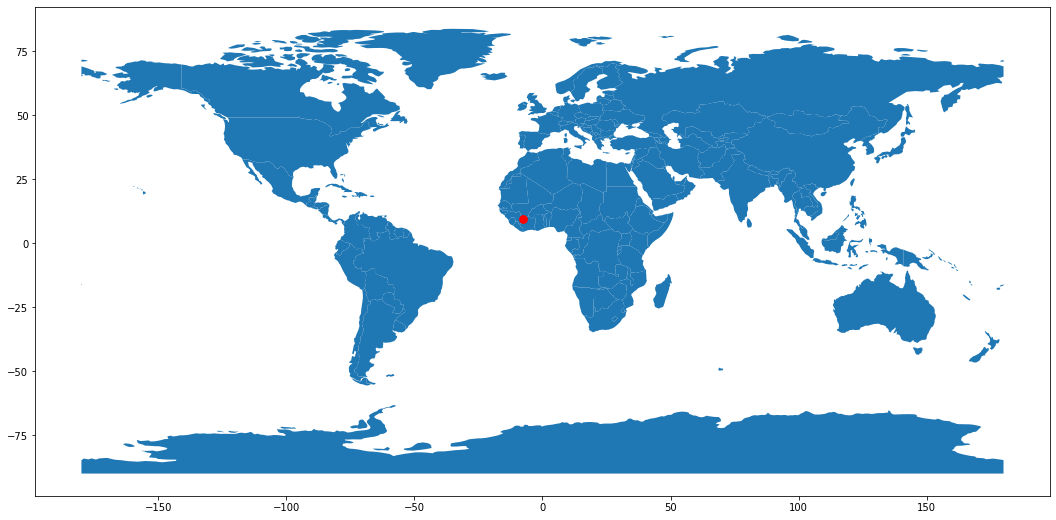

In [31]:
import geopandas
from matplotlib import pyplot as plt
from shapely.geometry import Point

fig, ax = plt.subplots(figsize=(20, 9))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax)

df_geo = geopandas.GeoDataFrame(geometry=[Point(float(lon), float(lat))])
df_geo['geometry'].plot(ax=ax, marker='o', color='red', markersize=60)

## Tracking the position of the craft <b>in time</b>

In [32]:
import geopandas
import time
import numpy as np
from shapely.geometry import Point

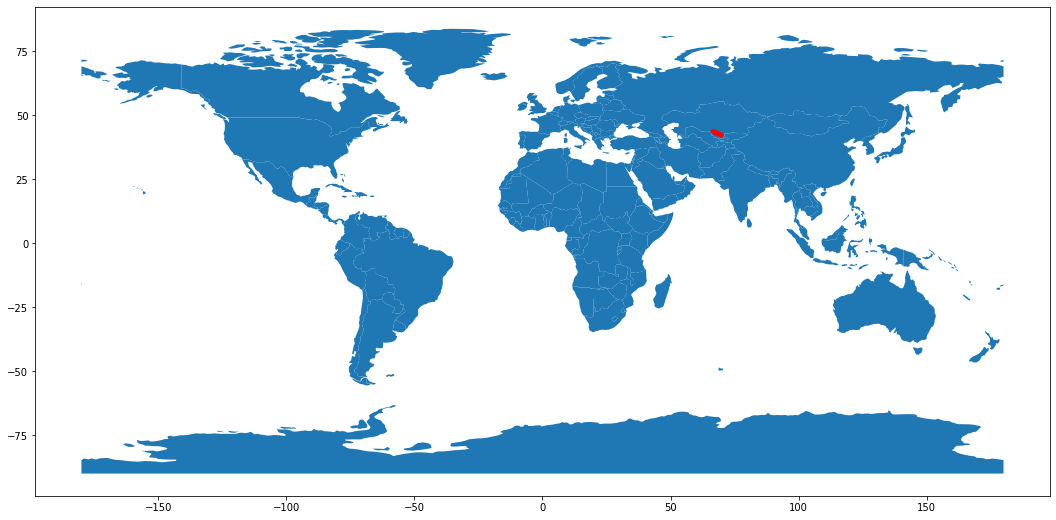

In [67]:
fig, ax = plt.subplots(figsize=(20, 9))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax)
positions = list()

for _ in np.arange(20):
    position = requests.get('http://api.open-notify.org/iss-now.json')
    position = position.json()
    (lon, lat) = float(position['iss_position']['longitude']), float(position['iss_position']['latitude'])
    positions.append(Point(lon, lat))
    time.sleep(2)
df_geo = geopandas.GeoDataFrame(geometry=positions)

df_geo['geometry'].plot(ax=ax, marker='o', color='red', markersize=10)

# Wikipedia API

In [32]:
# !pip install wikipedia

In [33]:
import wikipedia

In [374]:
# https://en.wikipedia.org/w/api.php?action=parse&page=Fuerteventura&format=json

In [34]:
fuerte = wikipedia.page('Fuerteventura')
print(fuerte.content)

Fuerteventura (pronounced [ˌfweɾteβenˈtuɾa]) is one of the Canary Islands, in the Atlantic Ocean and is part of the North Africa region, politically part of Spain. At 1,660 square kilometres (640 sq mi), it is the second largest of the Canary Islands, after Tenerife. As of 2018, Fuerteventura has 113,275 inhabitants. It was declared a biosphere reserve by UNESCO in May 2009. Its capital is Puerto del Rosario.


== Etymology ==
The island's name is a compound word formed by the Spanish words for "strong" (fuerte) and "fortune" (ventura). Traditionally, Fuerteventura's name has been regarded as a reference to the strong winds around the island and the resulting danger to nautical adventurers. However, it might have referred instead (or also) to wealth, luck or destiny. 
In 1339 the Mallorcan navigator Angelino Dulcert, in the Planisferio de Angelino Dulcert, referred to the island as "Forte Ventura". Another theory is that the island's name derives from "Fortunatae Insulae" (Fortunate Is

# Instagram Example
## We will login into the account, save the list of followers and download their profile image

In [42]:
# pip3 install 
# !pip install --upgrade moviepy

In [1]:
from InstagramAPI import InstagramAPI
import pickle

In [2]:
with open('instagram_cr.pickle', 'rb') as F:
    d = pickle.load(F)

Login in Instagram

In [4]:
import numpy as np
import time

username = d['user']
pwd = d['p']
API = InstagramAPI(username,pwd)
API.login()
time.sleep(2)

Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}
Request return 405 error!
{'message': '', 'status': 'fail'}
Request return 404 error!
Login success!



Get the used_id

In [5]:
user_id = API.username_id
user_id

11605297972

In [6]:
def getTotalFollowers(api, user_id):
    """
    Returns the list of followers of the user.
    It should be equivalent of calling api.getTotalFollowers from InstagramAPI
    """

    followers = []
    next_max_id = True
    while next_max_id:
        # first iteration hack
        if next_max_id is True:
            next_max_id = ''

        _ = api.getUserFollowers(user_id, maxid=next_max_id)
        followers.extend(api.LastJson.get('users', []))
        next_max_id = api.LastJson.get('next_max_id', '')
    return followers

Get the list of followers with the image

In [8]:
followers = getTotalFollowers(API, user_id)

names = [user['username'] for user in followers]
pictures = [user['profile_pic_url'] for user in followers]

names_pic = list(zip(names, pictures))

Save the info into a csv file

In [29]:
import csv
F = open('name_pic.csv', 'w')

writer_csv = csv.writer(F, delimiter=',')
writer_csv.writerow(['name','url_pic'])

for row in names_pic:
    writer_csv.writerow(row)
    
F.close()

Download the images: here is the solution: https://stackoverflow.com/questions/30229231/python-save-image-from-url/30229298

In [25]:
# https://stackoverflow.com/questions/30229231/python-save-image-from-url/30229298

import requests

img_data = requests.get(pictures[0]).content
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)